# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [4]:
# Checking the number of mice.
# Check the number of mice
num_mice = merged_data['Mouse ID'].nunique()
print("Number of mice:", num_mice)


Number of mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = duplicate_mice['Mouse ID'].unique()

print("Duplicate mice by ID number:")
print(duplicate_ids)

Duplicate mice by ID number:
['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the merged DataFrame to include only data for duplicate mouse IDs
duplicate_data = merged_data[merged_data['Mouse ID'].isin(duplicate_ids)]

print("Data for the duplicate mouse ID(s):")
print(duplicate_data)


Data for the duplicate mouse ID(s):
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  F

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

print("Clean DataFrame without duplicate mice:")
print(cleaned_data)


Clean DataFrame without duplicate mice:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38

In [8]:
# Checking the number of mice in the clean DataFrame.
# Check the number of mice in the clean DataFrame
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print("Number of mice in the clean DataFrame:", num_mice_cleaned)


Number of mice in the clean DataFrame: 249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
# Assemble the reprint("Summary Statistics Table for Tumor Volume:")
print("Summary Statistics Table for Tumor Volume:")
print(summary_stats)


Summary Statistics Table for Tumor Volume:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Use the agg() method to calculate multiple summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])\
    .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Using the aggregation method, produce the same summary statistics in a single line
print("Summary Statistics Table for Tumor Volume (Advanced Method):")
print(summary_stats_advanced)

Summary Statistics Table for Tumor Volume (Advanced Method):
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

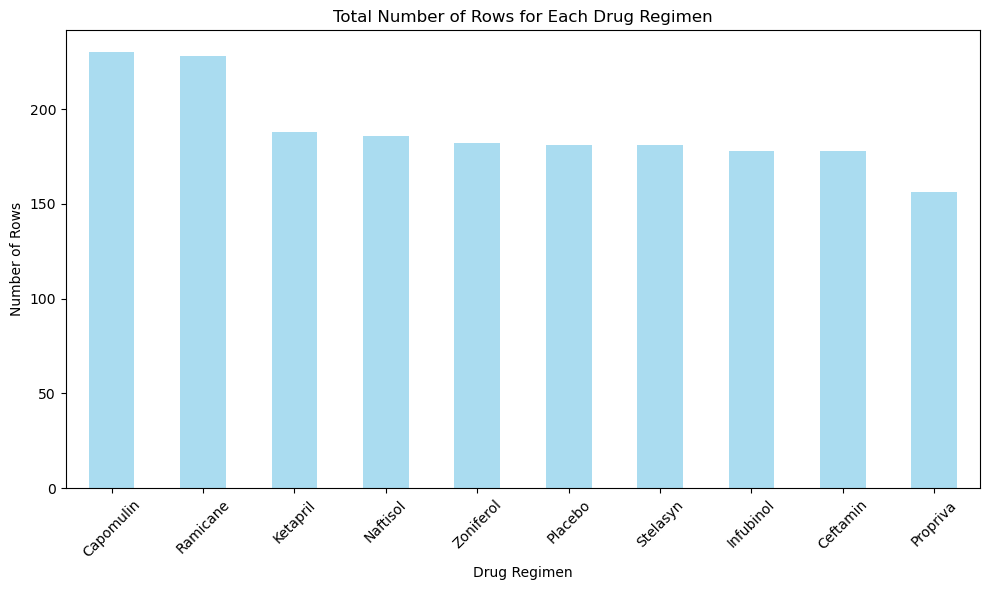

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Calculate the total number of rows for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Plot the bar plot using Pandas
drug_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.7)

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


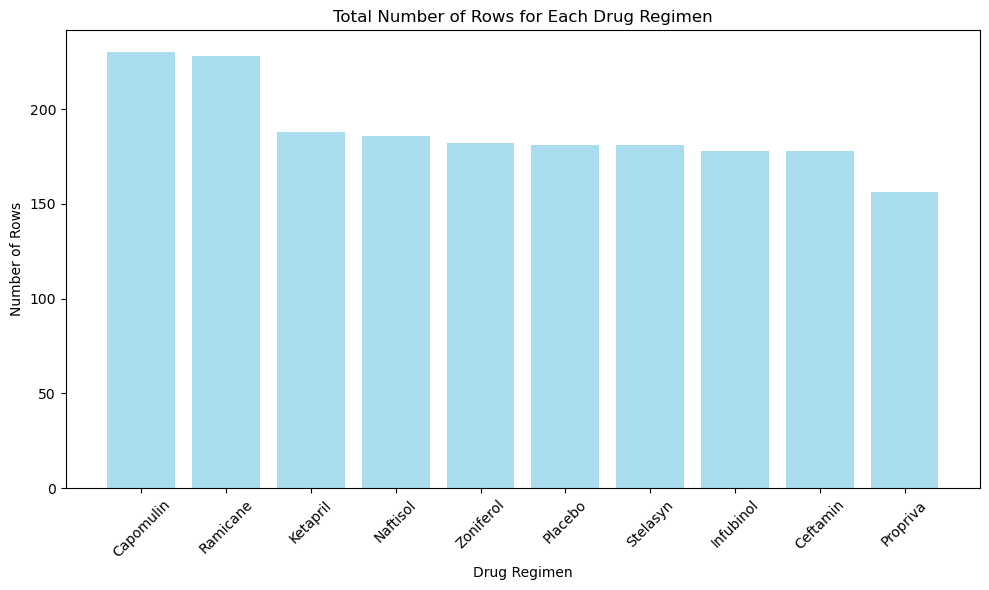

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Calculate the total number of rows for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Extract drug regimen names and corresponding counts
regimen_names = drug_counts.index
counts = drug_counts.values

# Plot the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts, color='skyblue', alpha=0.7)

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


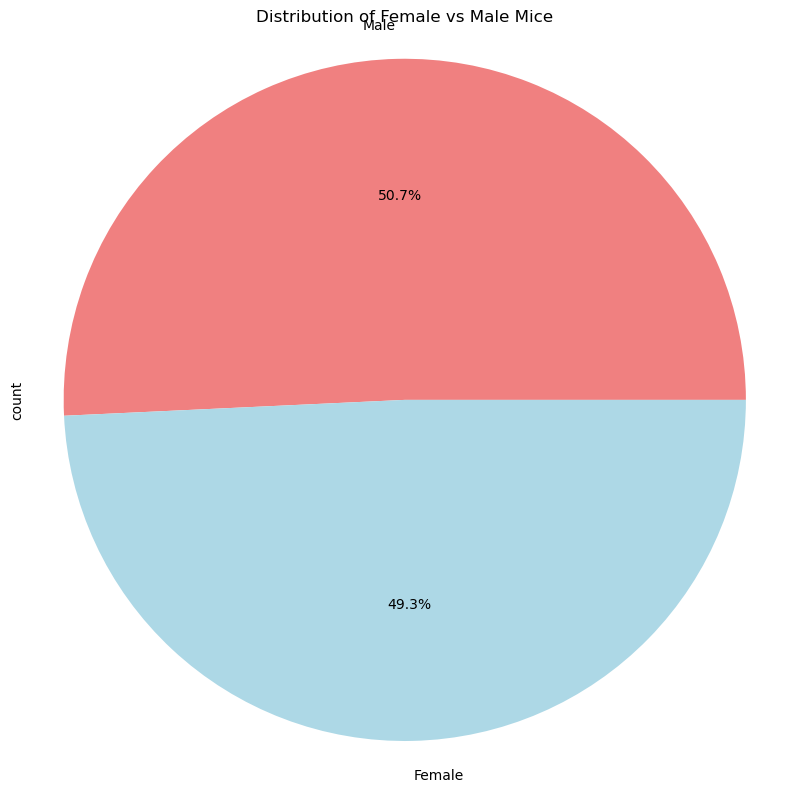

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the count of female and male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Plot the pie plot using Pandas
gender_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])

# Add title
plt.title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()


In [18]:

# Calculate the count of female and male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Display the counts
print("Count of female and male mice:")
print(gender_counts)




Count of female and male mice:
Sex
Male      958
Female    930
Name: count, dtype: int64


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Step 1: Filter the data to include only the desired treatment regimens
desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(desired_regimens)]

# Step 2: Get the last (greatest) timepoint for each mouse within these regimens
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Step 3: Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the final tumor volume of each mouse across the selected treatment regimens
print("Final tumor volume of each mouse across the selected treatment regimens:")
print(final_tumor_volume)

# Start by getting the last (greatest) timepoint for each mouse
# Group the data by Mouse ID and find the maximum timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Display the last (greatest) timepoint for each mouse
print("Last (greatest) timepoint for each mouse:")
print(last_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Group the data by Mouse ID and find the maximum timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame containing the tumor volume at the last timepoint for each mouse
print("DataFrame containing the tumor volume at the last timepoint for each mouse:")
print(merged_data)





Final tumor volume of each mouse across the selected treatment regimens:
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419         

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calculate the quartiles, IQR, and bounds for potential outliers
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print information about potential outliers
    print(f"Potential outliers for {treatment}: {outliers}")
    # Print IQR
    print(f"IQR for {treatment}: {iqr}")



Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Capomulin: 7.781863460000004
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Infubinol: 11.477135160000003
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ceftamin: 15.577752179999997


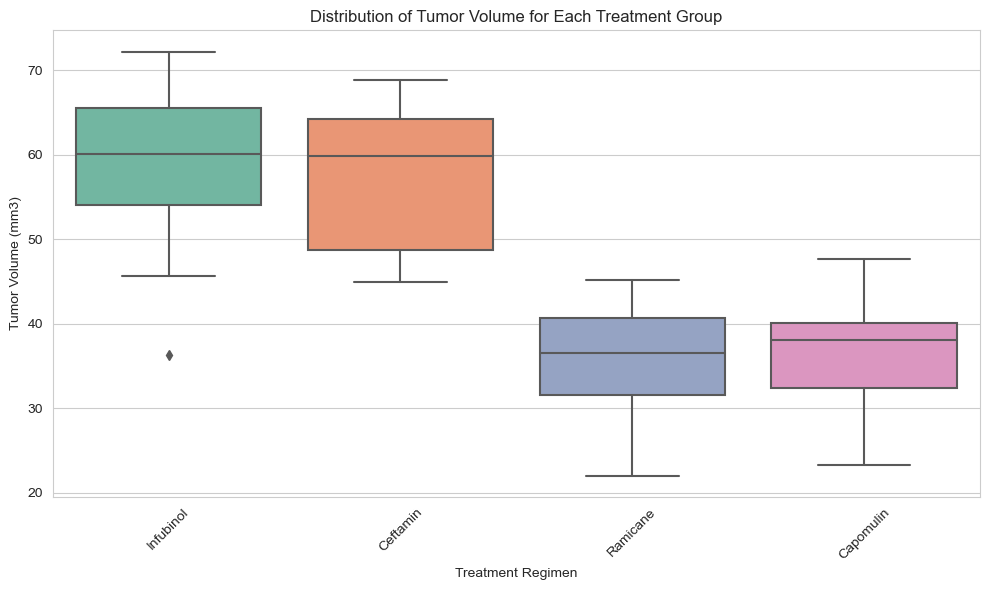

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import seaborn as sns

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_tumor_volume, x='Drug Regimen', y='Tumor Volume (mm3)', palette='Set2')

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

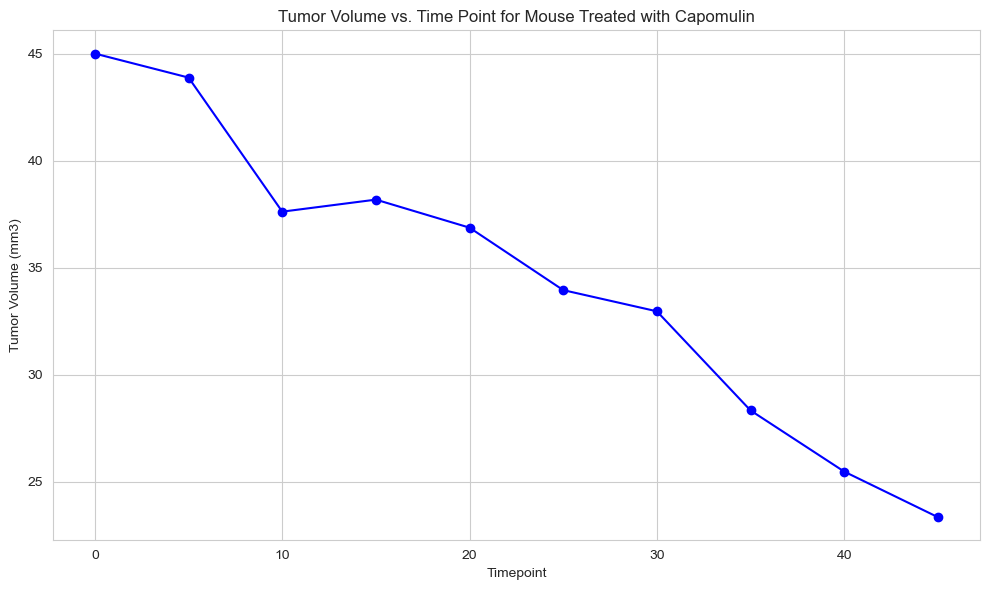

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse ID treated with Capomulin
mouse_id = 's185'

# Filter the data for the selected mouse ID treated with Capomulin
mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == mouse_id)]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')

# Add labels and title
plt.title('Tumor Volume vs. Time Point for Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


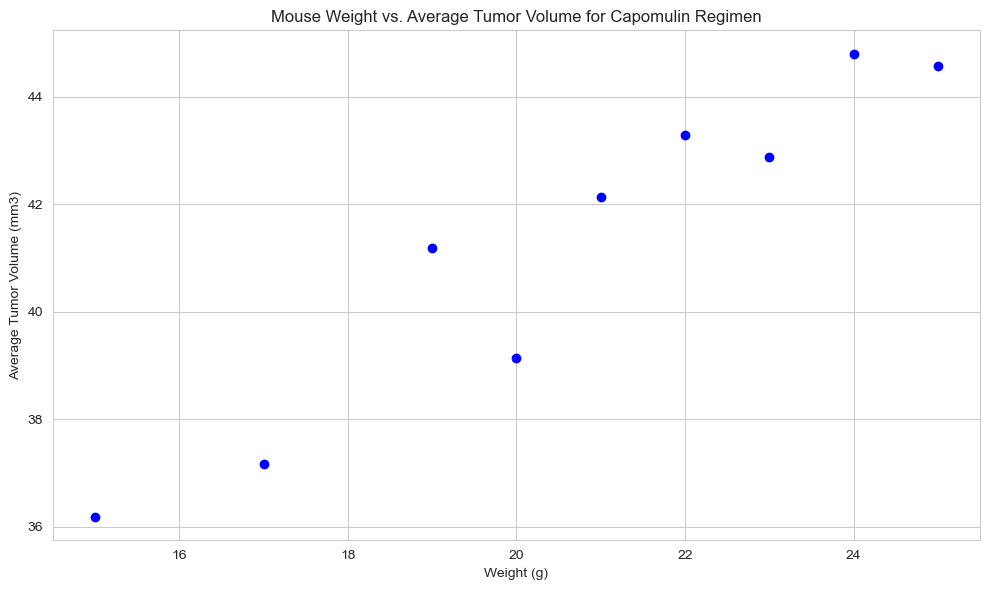

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Group the data by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = cleaned_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Step 2: Merge this information with the mouse metadata to get the weight of each mouse
average_tumor_volume = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Step 3: Filter the data to include only the Capomulin regimen
capomulin_data = average_tumor_volume[average_tumor_volume['Drug Regimen'] == 'Capomulin']

# Step 4: Calculate the average tumor volume for the entire Capomulin regimen
average_tumor_volume_capomulin = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Step 5: Create a scatter plot of mouse weight vs. the average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume_capomulin.index, average_tumor_volume_capomulin.values, color='b')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

# Print linear regression results
print("Linear Regression:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)


Correlation Coefficient: 0.841936342469472
Linear Regression:
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323
